<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/PARKINSON_DETECTION_USING_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENICIES


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA COLLECTION AND ANALYSIS

In [ ]:
parkinsons_data = pd.read_csv('/content/parkinsons.csv')

In [ ]:
#printing first five rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#number of rows and columns in the dataset
parkinsons_data.shape

(195, 24)

In [ ]:
#getting more info from the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
#checking for missing values in each column
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
#getting some statistical measure
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#distribution of target variable
parkinsons_data['status'].value_counts()

,count
status,
1,147
0,48


1---> PARKINSON'S POSITIVE
O---> PARKINSON'S NEGATIVE

In [ ]:
#grouping the data based on target variable
result = parkinsons_data.groupby('status').mean(numeric_only=True)
print(result)

        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                  

DATA PRE PROCESSING

In [ ]:
#seperating the features and target(status)
x =  parkinsons_data.drop(columns=['name', 'status'], axis=0)
y = parkinsons_data['status']

In [ ]:
print(x)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


#splitting the data into training data and testing data


In [ ]:
#splitting the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(195, 22) (156, 22) (39, 22)


data standardization

In [ ]:
#data standardization
scalar = StandardScaler()

In [ ]:
scalar.fit(x_train)

StandardScaler()

In [ ]:
x_train = scalar.transform(x_train)


In [ ]:
print(x_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
x_test = scalar.transform(x_test)
print(x_test)

[[-1.70008583e+00 -9.67968410e-01 -7.70130215e-01 -2.75000683e-01
   4.16156683e-01 -2.92615113e-01 -9.70869783e-02 -2.91621655e-01
  -4.94706656e-01 -4.90058396e-01 -5.32488171e-01 -4.26848854e-01
  -3.60251422e-01 -5.32484688e-01 -3.57189713e-01 -1.08840337e-01
   1.06963705e+00  1.05628304e+00  3.72180199e-01  1.94886208e+00
   3.66935071e-02  4.44314482e-01]
 [-1.39044095e+00 -9.29681132e-01 -7.37045677e-01  7.42068829e-01
   1.50451280e+00  8.54349819e-01  7.33639862e-01  8.53234751e-01
  -3.12538562e-03  3.01660094e-01  1.16511011e-01 -7.67595149e-02
  -2.23967413e-01  1.16829276e-01 -1.19644974e-01 -5.22790834e-01
   9.12650090e-01  1.31721995e+00  6.70118138e-01  4.74318608e-01
   1.42454868e-02  7.46859799e-01]
 [-1.35302065e+00 -6.29175292e-01 -7.29027225e-01  4.92094897e-01
   1.23242377e+00  4.52288742e-01  3.45291949e-01  4.53262231e-01
  -1.57435662e-01 -1.27992014e-01 -6.49095096e-02 -2.59345791e-01
  -2.60383383e-01 -6.52155416e-02  2.54927471e-01 -6.85306331e-01
   1.6

MODEL TRAINING

SUPPORT VECTOR MACHINE MODEL


In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
#training the svm model with training data
model.fit(x_train,y_train)


SVC(kernel='linear')

EVALUATION OF THE MODEL

ACCURACY SCORE


In [ ]:
#accuracy score of the training data
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_pred)

In [ ]:
print('ACCURACY SCORE OF TRAINING DATA:', training_data_accuracy)

ACCURACY SCORE OF TRAINING DATA: 0.8846153846153846


In [ ]:
#accuracy score of the testing data
x_test_pred = model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, x_test_pred)


In [ ]:
print('ACCURACY SCORE OF TESTING DATA:', testing_data_accuracy)

ACCURACY SCORE OF TESTING DATA: 0.8717948717948718


BUILDING PREDICTIVE SYSTEM


In [49]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

#changing input data into n umpy array
input_data_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

#standardize the data
stddata = scalar.transform(input_data_reshaped )

prediction = model.predict(stddata)

print(prediction)


if (prediction[0]==0):
  print('THE PERSON DOES NOT HAVE PARKINSON DISEASE')


else:
  print('THE PERSON HAS PARKINSON DISEASE')


[0]
THE PERSON DOES NOT HAVE PARKINSON DISEASE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


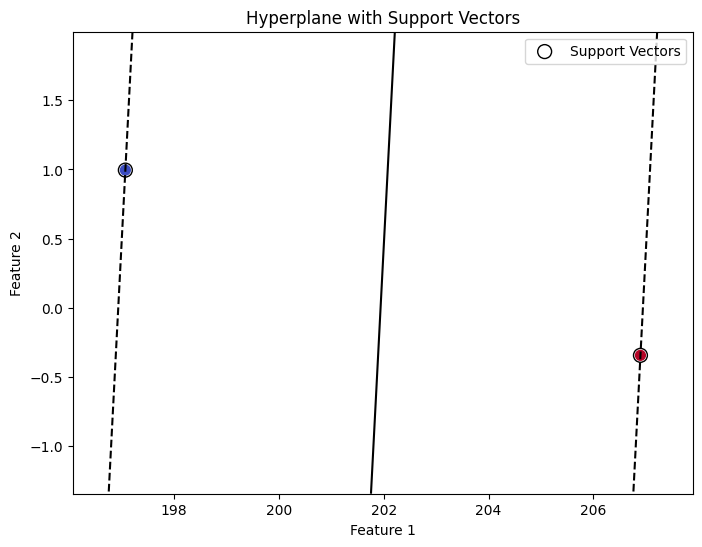

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Example input data (taking first two values for 2D)
input_data = (197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 0.00498, 0.01098, 0.09700,
              0.00563, 0.00680, 0.00802, 0.01689, 0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 1.743867, 0.085569)

# Using the first two features for 2D plotting
X = np.array(input_data[:2]).reshape(2, 1)  # Take the first two features for 2D visualization
X = np.hstack((X, np.random.randn(2, 1)))  # Create two features for training
y = [0, 1]  # Example labels for two classes

# Fit the SVM model (Support Vector Machine) with two features
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create a meshgrid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))

# Calculate the decision function for each point in the meshgrid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins (support vectors)
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# Scatter plot of the two selected features (points)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm)

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('Hyperplane with Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

